## Terminal Commands run

`muscle –in seqs.fa –out seqs.aligned.fa`

The input to this file were the sequences. The output is a series of aligned sequences that the algorithm found.

`fasttree –nt < seqs.aligned.fa > tree.nwk `

The input to this file were the aligned sequences. The output was a tree file.

In [34]:
from Bio import Phylo, SeqIO
%matplotlib inline
from io import StringIO
from matplotlib import figure
import matplotlib.pyplot as plt

trees = Phylo.parse('tree.nwk', 'newick')

In [35]:
trees = list(trees)

In [36]:
trees
tree = trees[0]

In [37]:
tree.ladderize()
plot = Phylo.draw_ascii(tree)

 , rh.50
 |
 , rh.52
 |
 | hu.39
 |
_, rh.53
 |
 , rh.49
 |
 , rh.57
 |
 | rh.51
 |
 , rh.64
 |
 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           _ hu.17
 |        __|         ,|
 |       |  |         || hu.6
 |       |  |  _______|
 |       |  | |       | , rh.10
 |       |  | |       |_|
 |       |  | |         , bb.1
 |       |  |_|         |
 |       |    |         | bb.2
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |_______|                   , hu.40
         |                   |
         |                   | hu.66
         |                   |
         |

There are definitely clusters. The farther along before a group has a common split means the sequences look closer together.  
For example, the cy.3 cy.6 cy.4 cy.5 are all pretty close sequences because of how far to the right they split from each other.

Some sequences that seem very far apart probably diverged very early on, which for example could be rh.50 and rh.13. This is an example of sequences far apart in time - rh.13 slowly changed. However, sequences like hu.67 versus cy.3 are different because they diverged early on, and slowly made different mutations.

## BLAST


I'm going to pick:  
- pi.2
- hu.6
- hu.41
- hu.31
- hu.46
- cy.5


In [40]:
records = []
for record in SeqIO.parse("seqs.fa", "fasta"):
    records.append(record)

In [42]:
filtered_records = []
for record in records:
    if record.name in ['pi.2', 'hu.6', 'hu.41', 'hu.31', 'hu.46', 'cy.5']:
        filtered_records.append(record)

In [43]:
filtered_records

[SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgagggcaacctctctgagggc...taa', SingleLetterAlphabet()), id='cy.5', name='cy.5', description='cy.5', dbxrefs=[]),
 SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacactctctctgaagga...taa', SingleLetterAlphabet()), id='hu.31', name='hu.31', description='hu.31', dbxrefs=[]),
 SeqRecord(seq=Seq('atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='hu.41', name='hu.41', description='hu.41', dbxrefs=[]),
 SeqRecord(seq=Seq('atggctgccgacggttatcttccagattggctcgaggacactctctctgaagga...taa', SingleLetterAlphabet()), id='hu.46', name='hu.46', description='hu.46', dbxrefs=[]),
 SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='hu.6', name='hu.6', description='hu.6', dbxrefs=[]),
 SeqRecord(seq=Seq('atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='pi.2', name='pi.2', description='pi.2', dbxrefs=[])]

In [44]:
for filtered_record in filtered_records:
    print(filtered_record.name)
    print(filtered_record.seq)

cy.5
atggctgccgatggttatcttccagattggctcgagggcaacctctctgagggcattcgcgagtggtgggacttgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaggtacctcggacccttcaacggactcgacaagggagagccggtcaacgaggcagacgccgcggccctcgagcacgacaaggcctacgacaagcagctcgagcagggggacaacccgtacctcaagtacaaccacgccgacgccgagtttcaggagcgtcttcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagacccatagaatcccccgactcctccacgggcatcggcaagaacggccagccgcccgctaaaaagaagctcaactttgggcagactggcgactcagagtcagtgcccgacccccaacctctcggagaacctcccgccgcgccctcaggtctgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggcgccgacggagtgggtaatgcctccggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgcacctgggccctgcccacctacaacaaccacctctacaagcagatatcaagtcagagcggggctaccaacgacaaccacttcttcggctacagcaccccctggggctattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccagaaagctgcggttcaagttgttcaacatccaggtcaaggaggtcacgacgaacgacggcgttacgaccatcgctaataacct

### Matches in BLAST

cy.5: Select seq AY243017.1	Non-human primate Adeno-associated virus isolate AAVcy.5 capsid protein (VP1) gene, complete cds

hu.31: Adeno-associated virus isolate hu.31 capsid protein VP1 (cap) gene, complete cds

hu.41: Adeno-associated virus isolate hu.41 capsid protein VP1 (cap) gene, complete cds

hu.46: Adeno-associated virus isolate hu.46 capsid protein VP1 (cap) gene, complete cds

hu.6: Adeno-associated virus isolate hu.6 capsid protein VP1 (cap) gene, complete cds

pi.2: Adeno-associated virus isolate pi.2 capsid protein VP1 (cap) gene, complete cds


Yes, they all match the capsid protein VPI (cap) gene. No, there are not any that don't match with the others from the ones that we chose. If our sequence is too short, then it may match many things that are not what we're looking for.

In [46]:
aligned_records = []
for record in SeqIO.parse("seqs.aligned.fa", "fasta"):
    aligned_records.append(record)

In [47]:
aligned_records

[SeqRecord(seq=Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), id='hu.31', name='hu.31', description='hu.31', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), id='hu.32', name='hu.32', description='hu.32', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTTAGTGAAGGA...TAA', SingleLetterAlphabet()), id='hu.14', name='hu.14', description='hu.14', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), id='hu.44', name='hu.44', description='hu.44', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCTGCCGACGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), id='hu.46', name='hu.46', description='hu.46', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet()), id='hu.43', name='hu.43', description='hu.43', dbxre

In [90]:
cluster1 = [seq for seq in aligned_records if seq.name in ['pi.2','pi.3','pi.1']]
cluster2 = [seq for seq in aligned_records if seq.name in ['hu.6','hu.17']]
cluster3 = [seq for seq in aligned_records if seq.name in ['rh.40','hu.67','hu.37','hu.40','hu.66','hu.42','hu.41','rh.38']]
cluster4 = [seq for seq in aligned_records if seq.name in ['hu.14','hu.31','hu.32']]
cluster5 = [seq for seq in aligned_records if seq.name in ['hu.44','hu.46']]
cluster6 = [seq for seq in aligned_records if seq.name in ['cy.3','cy.6','cy.4','cy.5','rh.13']]

def show_cluster_GC_content(cluster):
    x = []
    y_GC = []
    y_AT = []

    cluster_size = len(cluster)

    for i in range(len(cluster[0].seq)):
        x.append(i)
        values = [str(sequence.seq[i]) for sequence in cluster]
        nulls = values.count('-')
        try:
            GC_content = (values.count('G') + values.count('C'))/(cluster_size-nulls)
            y_GC.append(GC_content)
            y_AT.append(1-GC_content)
        except:
            y_GC.append(0)
            y_AT.append(0)

    plt.figure(figsize=(10, 10))
    plt.bar(x, y_GC)
    plt.bar(x, y_AT, bottom=y_GC)
    plt.xlabel('Position in Sequence')
    plt.ylabel('%AT or %GC')
    plt.show()

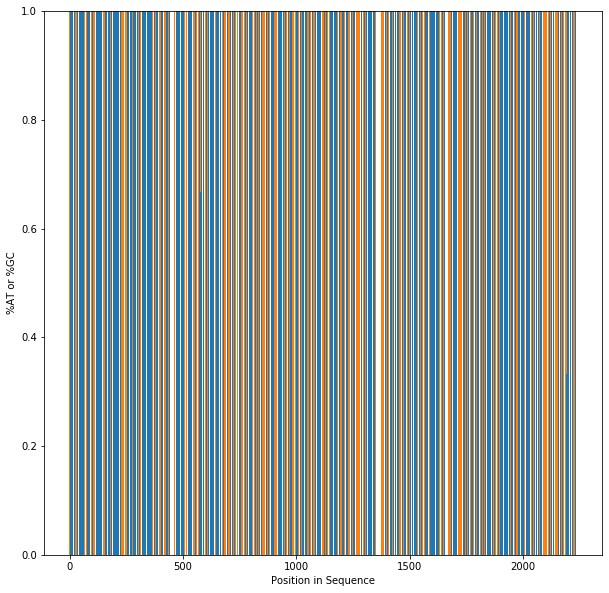

In [91]:
show_cluster_GC_content(cluster1)

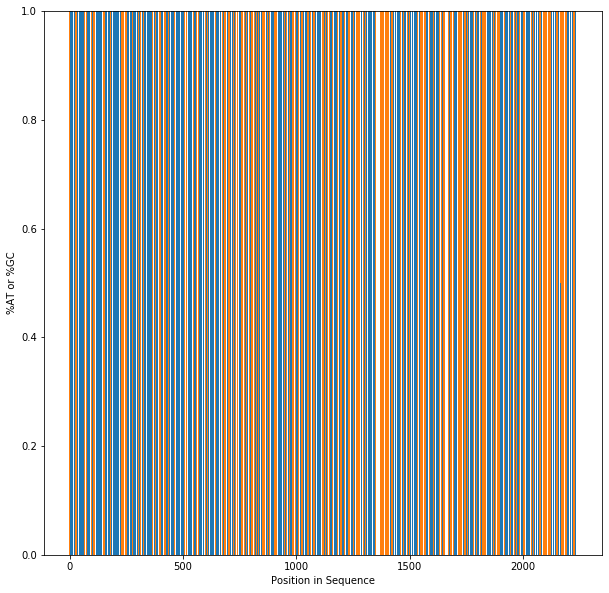

In [92]:
show_cluster_GC_content(cluster2)

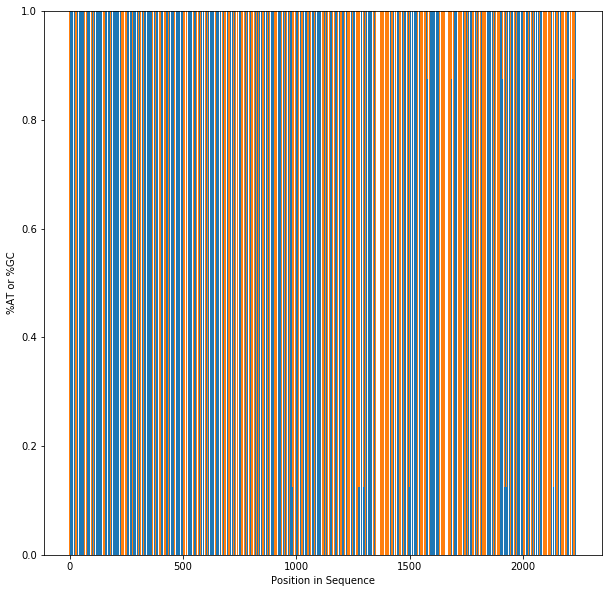

In [93]:
show_cluster_GC_content(cluster3)

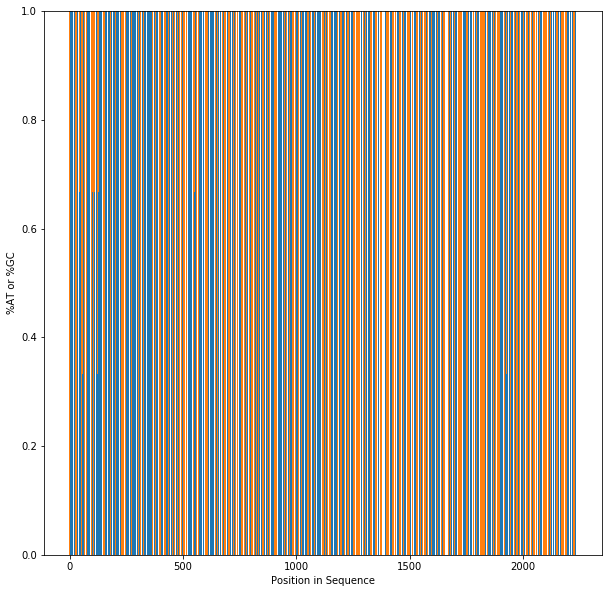

In [94]:
show_cluster_GC_content(cluster4)

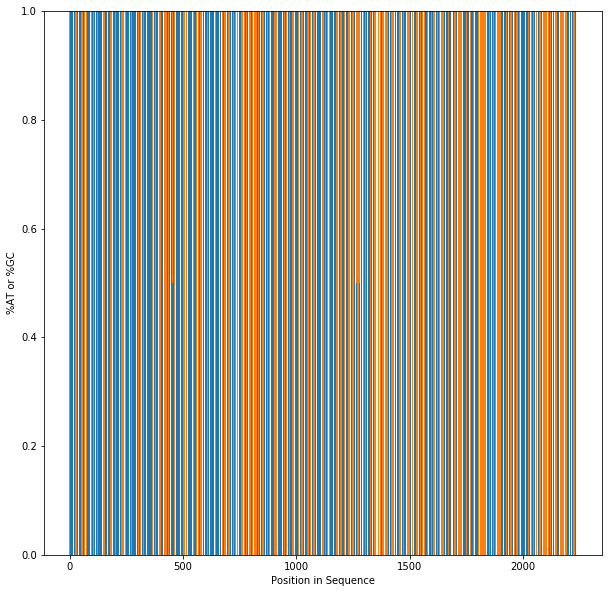

In [95]:
show_cluster_GC_content(cluster5)

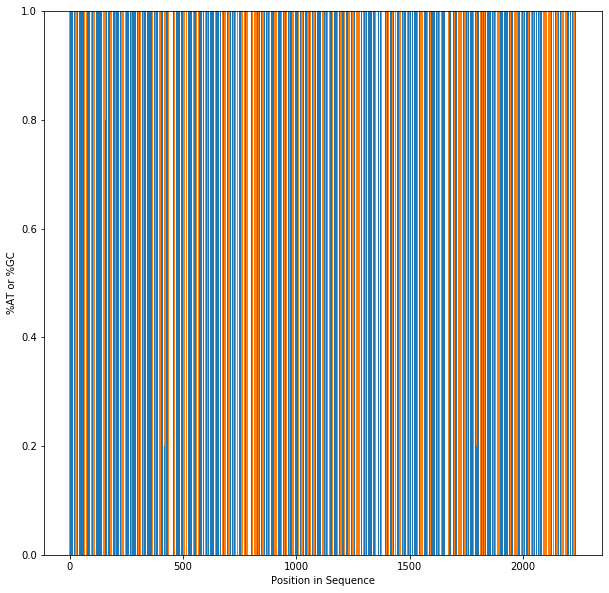

In [96]:
show_cluster_GC_content(cluster6)

In [97]:
print(aligned_records[0].seq)

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCCCCACCACCAAAGCCCGCAGAGCGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCGGCAACGGACTCGACAAGGGGGAGCCGGTCAACGCAGCAGACGCGGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAGGCCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCCGAGTTCCAGGAGCGGCTCAAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAAAAGAGGCTTCTTGAACCTCTTGGTCTGGTTGAGGAAGCGGCTAAGACGGCTCCTGGAAAGAAGAGGCCTGTAGAGCAGTCTCCTCAGGA---ACCGGACTCCTCCGCGGGTATTGGCAAATCGGGTTCACAGCCCGCTAAAAAGAAACTCAATTTCGGTCAGACTGGCGACACAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCTCCCGCAGCCCCCTCAGGTGTGGGATCTCTTACAATGGCTTCAGGTGGTGGCGCACCAGTGGCAGACAATAACGAAGGTGCCGATGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCCAATGGCTGGGGGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAATCACCTCTACAAGCAAATCTCCAACAGCACATCTGGAGGATCTTCAAATGACAACGCCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCTAAGCGACTCAACTTCAAGCTCTTCAACATTCAGGTCAAAGAGGTTACGGACAACAATGGAGTCAAGA

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa716c8df60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa716c8d588>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa716c8d748>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa712994710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa7129942e8>,
 'means': []}

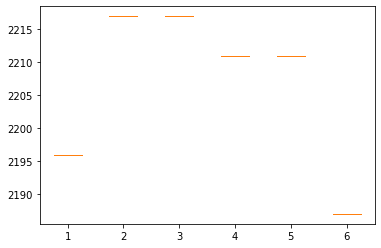

In [115]:
lengths_x = []
lengths_y = [list() for _ in range(6)]

for sequence in cluster1:
    lengths_x.append(1)
    cluster_sequence = str(sequence.seq)
    lengths_y[0].append(len(cluster_sequence) - cluster_sequence.count("-"))
                     
for sequence in cluster2:
    lengths_x.append(2)
    cluster_sequence = str(sequence.seq)
    lengths_y[1].append(len(cluster_sequence) - cluster_sequence.count("-"))

for sequence in cluster3:
    lengths_x.append(3)
    cluster_sequence = str(sequence.seq)
    lengths_y[2].append(len(cluster_sequence) - cluster_sequence.count("-"))

for sequence in cluster4:
    lengths_x.append(4)
    cluster_sequence = str(sequence.seq)
    lengths_y[3].append(len(cluster_sequence) - cluster_sequence.count("-"))
    
for sequence in cluster5:
    lengths_x.append(5)
    cluster_sequence = str(sequence.seq)
    lengths_y[4].append(len(cluster_sequence) - cluster_sequence.count("-"))
    
for sequence in cluster6:
    lengths_x.append(6)
    cluster_sequence = str(sequence.seq)
    lengths_y[5].append(len(cluster_sequence) - cluster_sequence.count("-"))
    
plt.boxplot(lengths_y)

In [116]:
lengths_y

[[2196, 2196, 2196],
 [2217, 2217],
 [2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217],
 [2211, 2211, 2211],
 [2211, 2211],
 [2187, 2187, 2187, 2187, 2187]]

These results make sense because the lengths of each of the groups is actually the same, so we cannot see any differences as you might see on other box plots.